In [3]:
import pandas as pd

log_file_path = 'access (1).log'
with open(log_file_path, 'r') as file:
    log_lines = file.readlines()

log_lines[:10]

['1.202.218.8 - - [20/Jun/2012:19:05:12 +0200] "GET /robots.txt HTTP/1.0" 404 492 "-" "\\"Mozilla/5.0"\n',
 '208.115.113.91 - - [20/Jun/2012:19:20:16 +0200] "GET /logs/?C=M;O=D HTTP/1.1" 200 1278 "-" "Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bot@gmail.com)"\n',
 '123.125.71.20 - - [20/Jun/2012:19:30:40 +0200] "GET / HTTP/1.1" 200 912 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '220.181.108.101 - - [20/Jun/2012:19:31:01 +0200] "GET / HTTP/1.1" 200 912 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '123.125.68.79 - - [20/Jun/2012:19:53:24 +0200] "GET / HTTP/1.1" 200 625 "-" "Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)"\n',
 '178.154.210.252 - - [20/Jun/2012:19:54:10 +0200] "GET /?C=S;O=A HTTP/1.1" 200 663 "-" "Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"\n',
 '74.125.126.102 - - [20/Jun/2012:20:15:28 +0200] "GET / HTTP/1.1" 200

In [4]:
import re

def parse_log_line(line):
    match = re.match(r'(\d+\.\d+\.\d+\.\d+) - - \[(.*?)\] "(.*?)" (\d+) (\d+) "(.*?)" "(.*?)"', line)
    if match:
        return match.groups()
    return None

parsed_log_lines = [parse_log_line(line) for line in log_lines]
parsed_log_lines = [line for line in parsed_log_lines if line is not None]

log_df = pd.DataFrame(parsed_log_lines, columns=['IP', 'Timestamp', 'Request', 'Status', 'Bytes', 'Referrer', 'UserAgent'])
log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
log_df['Date'] = log_df['Timestamp'].dt.date

log_df.head()

,IP,Timestamp,Request,Status,Bytes,Referrer,UserAgent,Date
0,1.202.218.8,2012-06-20 19:05:12+02:00,GET /robots.txt HTTP/1.0,404,492,-,\,2012-06-20
1,208.115.113.91,2012-06-20 19:20:16+02:00,GET /logs/?C=M;O=D HTTP/1.1,200,1278,-,Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bo...,2012-06-20
2,123.125.71.20,2012-06-20 19:30:40+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20
3,220.181.108.101,2012-06-20 19:31:01+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20
4,123.125.68.79,2012-06-20 19:53:24+02:00,GET / HTTP/1.1,200,625,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20


In [8]:
user_count_per_day = log_df.groupby('Date')['IP'].nunique()
user_count_per_day_df = user_count_per_day.reset_index()
user_count_per_day_df

,Date,IP
0,2012-06-20,21
1,2012-06-21,69
2,2012-06-22,68
3,2012-06-23,83
4,2012-06-24,78
5,2012-06-25,73
6,2012-06-26,90
7,2012-06-27,73
8,2012-06-28,88
9,2012-06-29,93


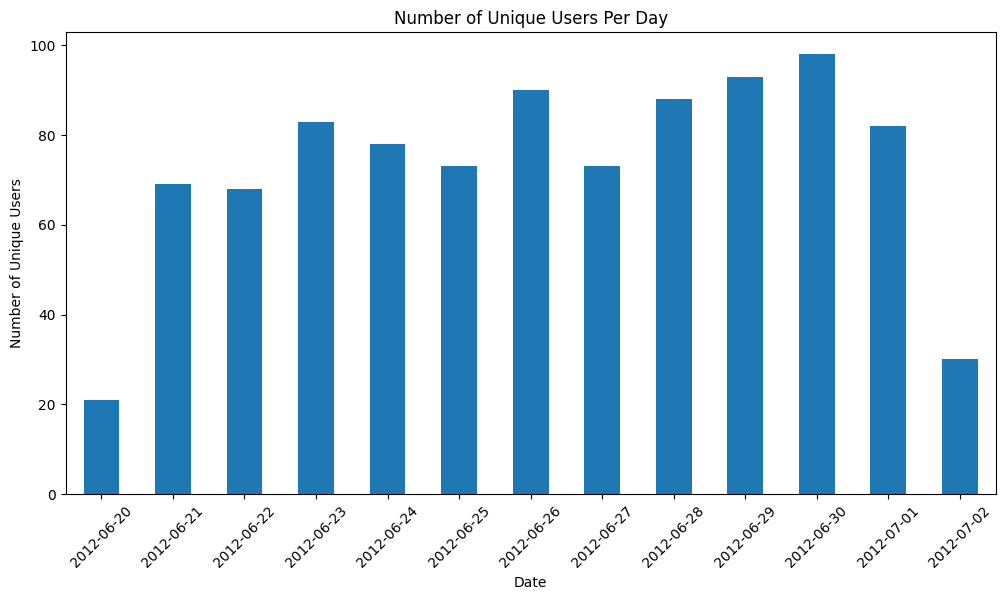

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
user_count_per_day.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users Per Day')
plt.xticks(rotation=45)
plt.show()

In [10]:
user_agent_counts = log_df['UserAgent'].value_counts()
user_agent_counts.head(10)

UserAgent
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)    556
Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)                       276
Mozilla/5.0 (compatible; MJ12bot/v1.4.3; http://www.majestic12.co.uk/bot.php?+)        234
\                                                                                      130
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)               128
Mozilla/5.0 (compatible; Ezooms/1.0; ezooms.bot@gmail.com)                              69
Mozilla/5.0 (compatible; MJ12bot/v1.4.2; http://www.majestic12.co.uk/bot.php?+)         68
Java/1.6.0_04                                                                           58
Mozilla/5.0 (compatible; AhrefsBot/3.1; +http://ahrefs.com/robot/)                      39
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm)                 30
Name: count, dtype: int64

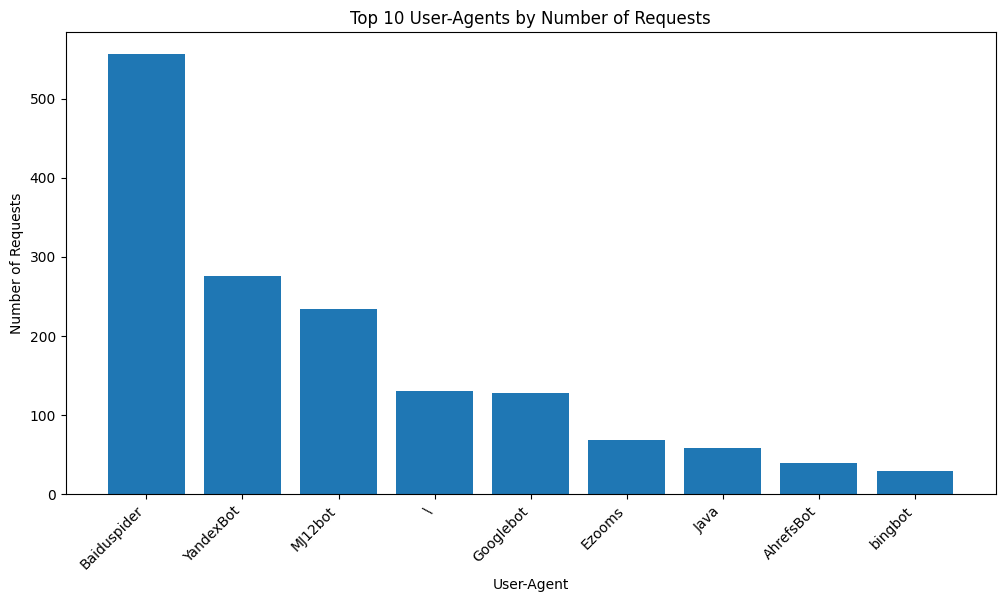

In [11]:
def shorten_user_agent(ua):
    if 'Baiduspider' in ua:
        return 'Baiduspider'
    if 'YandexBot' in ua:
        return 'YandexBot'
    if 'MJ12bot' in ua:
        return 'MJ12bot'
    if 'Googlebot' in ua:
        return 'Googlebot'
    if 'Ezooms' in ua:
        return 'Ezooms'
    if 'Java' in ua:
        return 'Java'
    if 'AhrefsBot' in ua:
        return 'AhrefsBot'
    if 'bingbot' in ua:
        return 'bingbot'
    return ua.split('/')[0]

top_user_agents = user_agent_counts.head(10)
shortened_labels = top_user_agents.index.to_series().apply(shorten_user_agent)

plt.figure(figsize=(12, 6))
plt.bar(shortened_labels, top_user_agents.values)
plt.xlabel('User-Agent')
plt.ylabel('Number of Requests')
plt.title('Top 10 User-Agents by Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
def extract_os(user_agent):
    if 'Windows' in user_agent:
        return 'Windows'
    if 'Macintosh' in user_agent or 'Mac OS' in user_agent:
        return 'Mac OS'
    if 'Linux' in user_agent:
        return 'Linux'
    if 'Android' in user_agent:
        return 'Android'
    if 'iPhone' in user_agent or 'iPad' in user_agent or 'iPod' in user_agent:
        return 'iOS'
    return 'Other'


log_df['OperatingSystem'] = log_df['UserAgent'].apply(extract_os)
os_counts = log_df['OperatingSystem'].value_counts()
os_counts

OperatingSystem
Other      1830
Windows     241
Linux        19
Mac OS       18
Name: count, dtype: int64

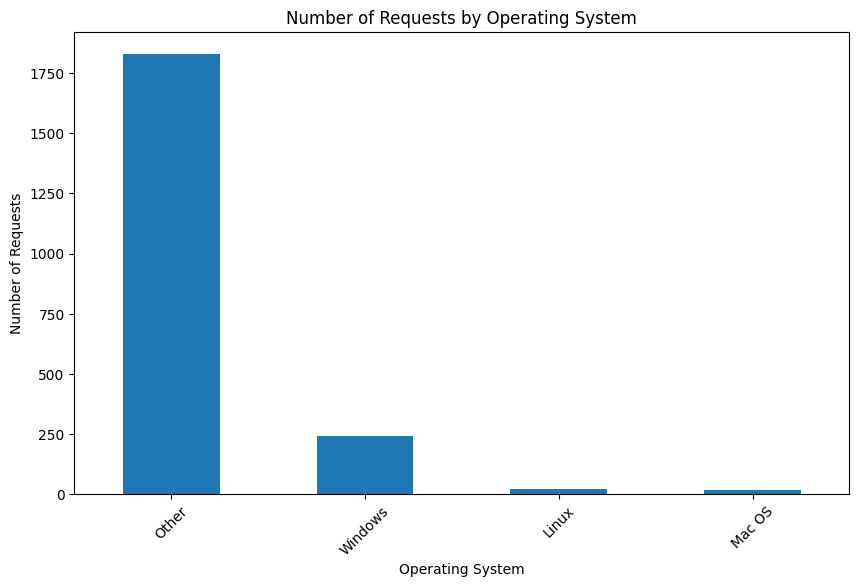

In [13]:
plt.figure(figsize=(10, 6))
os_counts.plot(kind='bar')
plt.xlabel('Operating System')
plt.ylabel('Number of Requests')
plt.title('Number of Requests by Operating System')
plt.xticks(rotation=45)
plt.show()

In [16]:
import geoip2.database

reader = geoip2.database.Reader('GeoLite2-Country.mmdb')

def map_ip_to_country(ip):
    try:
        response = reader.country(ip)
        return response.country.name
    except Exception as e:
        print(f"Error for IP {ip}: {e}")
        return 'Unknown'

log_df['Country'] = log_df['IP'].apply(map_ip_to_country)
country_counts = log_df['Country'].value_counts()
print(country_counts)

Country
China              718
United States      541
Russia             324
France             106
Germany             70
Romania             62
Ukraine             45
The Netherlands     39
United Kingdom      32
Japan               26
Israel              23
Czechia             20
Poland              16
Norway              10
Malaysia             9
India                7
Brazil               7
Hong Kong            7
Indonesia            5
Iran                 4
Argentina            3
Ecuador              3
Türkiye              3
Sri Lanka            3
Sweden               3
Canada               3
Sudan                2
Ghana                2
Hungary              2
Spain                2
Luxembourg           2
Thailand             2
Belgium              2
Egypt                1
Venezuela            1
Vietnam              1
Finland              1
South Africa         1
Name: count, dtype: int64


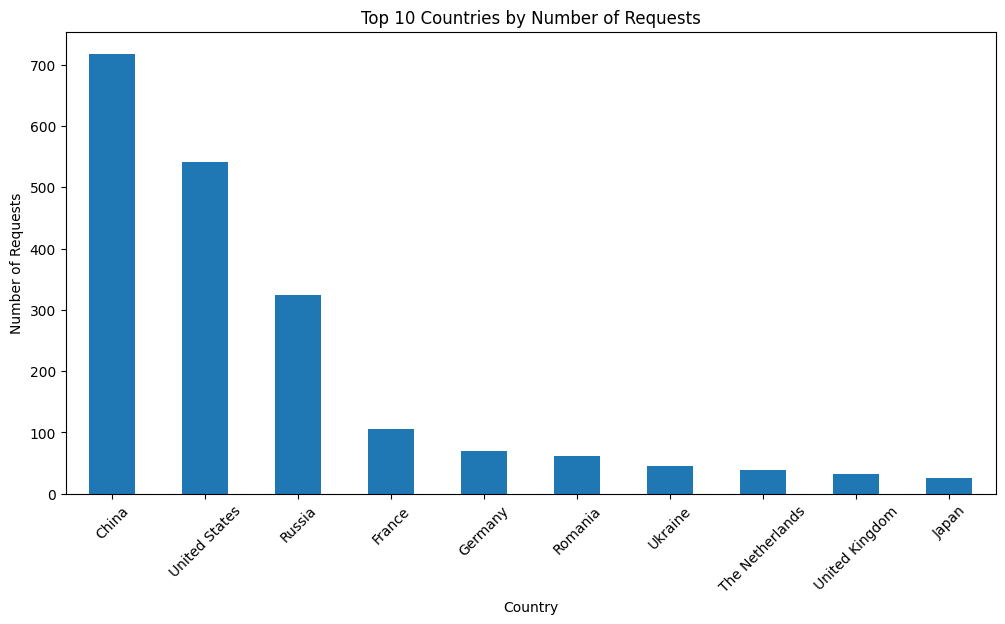

In [18]:
top_countries = country_counts.head(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Requests')
plt.title('Top 10 Countries by Number of Requests')
plt.xticks(rotation=45)
plt.show()

In [33]:
def get_bot_name(user_agent):
    bots = {
        'Googlebot': 'Googlebot',
        'Bingbot': 'Bingbot',
        'Slurp': 'Yahoo! Slurp',
        'DuckDuckBot': 'DuckDuckBot',
        'Baiduspider': 'Baiduspider',
        'YandexBot': 'YandexBot',
        'Sogou': 'Sogou',
        'Exabot': 'Exabot',
        'facebot': 'Facebook',
        'ia_archiver': 'Alexa Crawler'
    }
    for bot, name in bots.items():
        if bot in user_agent:
            return name
    return None


log_df['BotName'] = log_df['UserAgent'].apply(get_bot_name)
bot_requests_df = log_df[log_df['BotName'].notnull()]
bot_counts = bot_requests_df['BotName'].value_counts()
top_bots = bot_counts.head(10)
bot_requests_df

,IP,Timestamp,Request,Status,Bytes,Referrer,UserAgent,Date,OperatingSystem,Country,IsBot,BotName
2,123.125.71.20,2012-06-20 19:30:40+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20,Other,China,True,Baiduspider
3,220.181.108.101,2012-06-20 19:31:01+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20,Other,China,True,Baiduspider
4,123.125.68.79,2012-06-20 19:53:24+02:00,GET / HTTP/1.1,200,625,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-06-20,Other,China,True,Baiduspider
5,178.154.210.252,2012-06-20 19:54:10+02:00,GET /?C=S;O=A HTTP/1.1,200,663,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,2012-06-20,Other,Russia,True,YandexBot
14,66.249.72.65,2012-06-20 21:28:00+02:00,GET /robots.txt HTTP/1.1,404,508,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,2012-06-20,Other,United States,True,Googlebot
...,...,...,...,...,...,...,...,...,...,...,...,...
2098,123.125.71.55,2012-07-02 07:24:18+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-07-02,Other,China,True,Baiduspider
2099,220.181.108.121,2012-07-02 07:24:35+02:00,GET / HTTP/1.1,200,912,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-07-02,Other,China,True,Baiduspider
2100,119.63.196.82,2012-07-02 08:04:52+02:00,GET /robots.txt HTTP/1.1,404,465,-,Baiduspider+(+http://www.baidu.com/search/spid...,2012-07-02,Other,Japan,True,Baiduspider
2101,123.125.71.22,2012-07-02 08:32:44+02:00,GET / HTTP/1.1,200,916,-,Mozilla/5.0 (compatible; Baiduspider/2.0; +htt...,2012-07-02,Other,China,True,Baiduspider


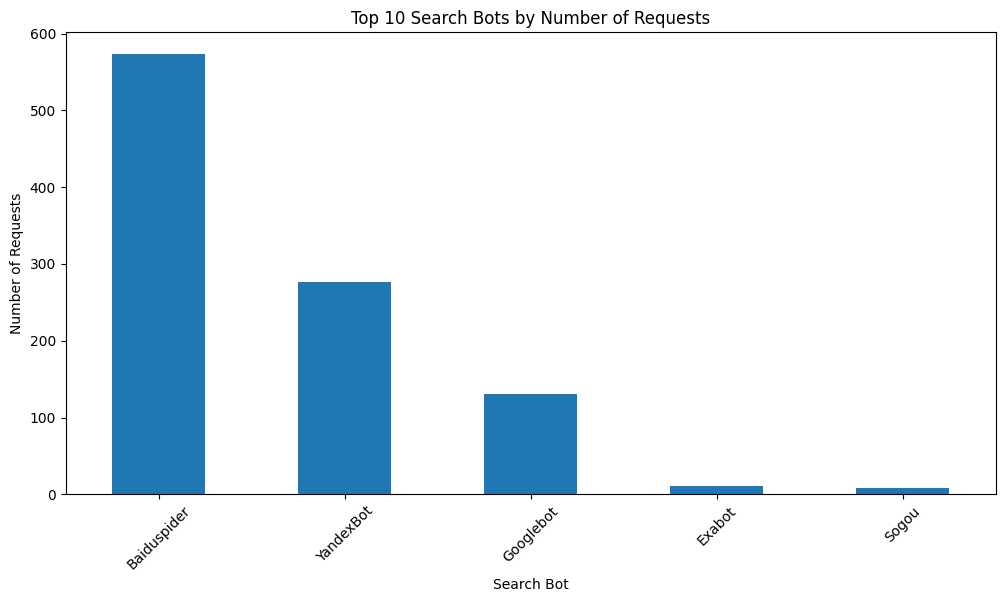

In [28]:
plt.figure(figsize=(12, 6))
top_bots.plot(kind='bar')
plt.xlabel('Search Bot')
plt.ylabel('Number of Requests')
plt.title('Top 10 Search Bots by Number of Requests')
plt.xticks(rotation=45)
plt.show()

In [37]:
log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'], format='%d/%b/%Y:%H:%M:%S %z')
log_df['Date'] = log_df['Timestamp'].dt.date
requests_per_day = log_df['Date'].value_counts().sort_index()

requests_per_day_df = pd.DataFrame(requests_per_day).reset_index()
requests_per_day_df.columns = ['Date', 'RequestCount']

Q1 = requests_per_day_df['RequestCount'].quantile(0.25)
Q3 = requests_per_day_df['RequestCount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = requests_per_day_df[(requests_per_day_df['RequestCount'] < lower_bound) | (requests_per_day_df['RequestCount'] > upper_bound)]

print("Anomalies detected:")
print(anomalies)

Anomalies detected:
          Date  RequestCount
0   2012-06-20            26
7   2012-06-27           251
10  2012-06-30           239
12  2012-07-02            42


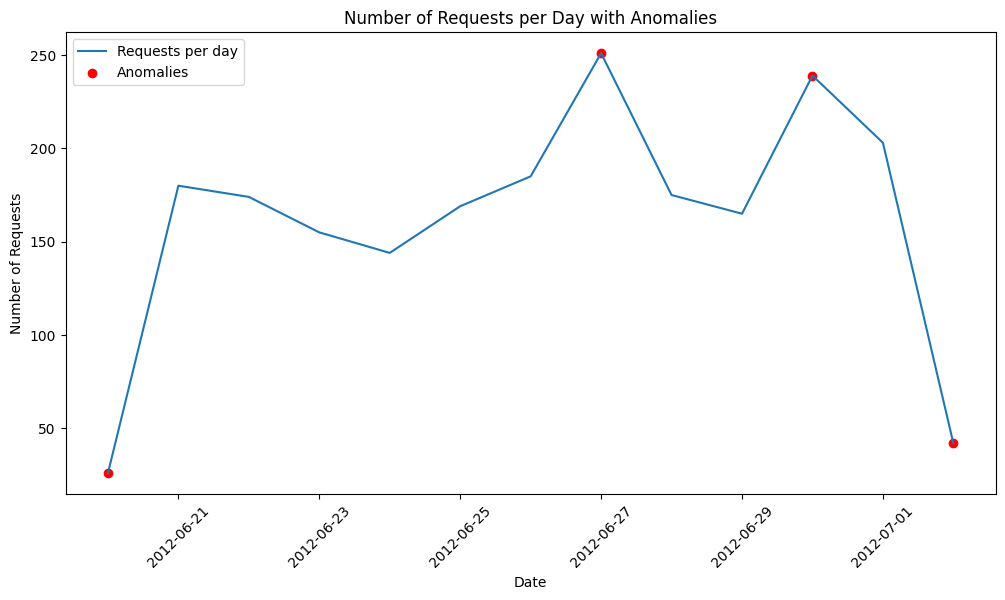

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(requests_per_day_df['Date'], requests_per_day_df['RequestCount'], label='Requests per day')
plt.scatter(anomalies['Date'], anomalies['RequestCount'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.title('Number of Requests per Day with Anomalies')
plt.legend()
plt.xticks(rotation=45)
plt.show()